# Configurar librería
Descarga el paquete y lo instala localmente.

In [1]:
%%bash
# Descargar la librería y descomprimirla en 'object_detection/'
gdown --id '1tgo0Jz-Kj3NdV42dRxUFxFThB-hfa_UW'
pip install simple-object-detection-0.0.2.tar.gz

Processing ./simple-object-detection-0.0.2.tar.gz
  Created wheel for simple-object-detection: filename=simple_object_detection-0.0.2-cp37-none-any.whl size=11693 sha256=f6f6b48cf85d8ddd557407c82135dd6b85eff0faa8fedcce2bc753567a797262
  Stored in directory: /root/.cache/pip/wheels/e1/5c/6d/71e1f9e9e81ad8504d6adb44116adfe1786d162de49bbaa61d
Successfully built simple-object-detection


Downloading...
From: https://drive.google.com/uc?id=1tgo0Jz-Kj3NdV42dRxUFxFThB-hfa_UW
To: /content/simple-object-detection-0.0.2.tar.gz
100%|##########| 9.06k/9.06k [00:00<00:00, 16.9MB/s]


# Configurar notebook y dependencias

In [2]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from simple_object_detection.detection_model import DetectionModel

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (30, 12)

Evitar los mensajes de tensorflow-hub.

In [4]:
import logging

# No funciona...
tf.get_logger().setLevel('ERROR')
logging.getLogger('tensorflow_hub').setLevel('ERROR')
logging.getLogger('simple_object_detection').setLevel('ERROR')

## Configurar datos de ejemplo

Imágenes de ejemplo

In [5]:
!gdown --id '1kq3bwNx3-CtWdxcz6tzW83RBGaCc32dz'
!tar -xf sample_data.tar -C .

Downloading...
From: https://drive.google.com/uc?id=1kq3bwNx3-CtWdxcz6tzW83RBGaCc32dz
To: /content/sample_data.tar
3.98MB [00:00, 35.2MB/s]


Configurar la ruta de los datos de ejemplo y una imagen de ejemplo

In [6]:
file_path = 'sample_data/'

In [7]:
from simple_object_detection.utils import load_image

image = load_image(file_path + 'yunquera-4.jpg')

# Ejecuciones con distintas redes

In [8]:
from simple_object_detection.utils import set_bounding_boxes_in_image, filter_objects

def show_detections_in_image(network, image, title):
  # Extraer objetos
  objects = network.get_objects(image)
  objects_filtered = filter_objects(objects,
                                    # classes=['motorcycle', 'motorbike', 'wheel', 'car', 'truck', ],
                                    min_score=0.3)
  # Extraer el frame vacío, con todos los objetos y con los objetos filtrados.
  image_with_boxes = set_bounding_boxes_in_image(image, objects)
  image_with_boxes_filtered = set_bounding_boxes_in_image(image, objects_filtered)
  # Añadir los centroides a la imagen con los objetos filtrados
  for obj in objects_filtered:
    cv2.circle(image_with_boxes_filtered, obj.get_centroid(), 2, (255, 0, 0), 3)
  # Imprimir las imágenes.
  fig, axes = plt.subplots(1, 2)
  fig.suptitle(title, size=25)
  axes[0].imshow(image_with_boxes)
  axes[0].set_title('Image with all detections')
  axes[1].imshow(image_with_boxes_filtered)
  axes[1].set_title('Image with filtered detections and centroids')

  return image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered

## Modelo: YOLOv3

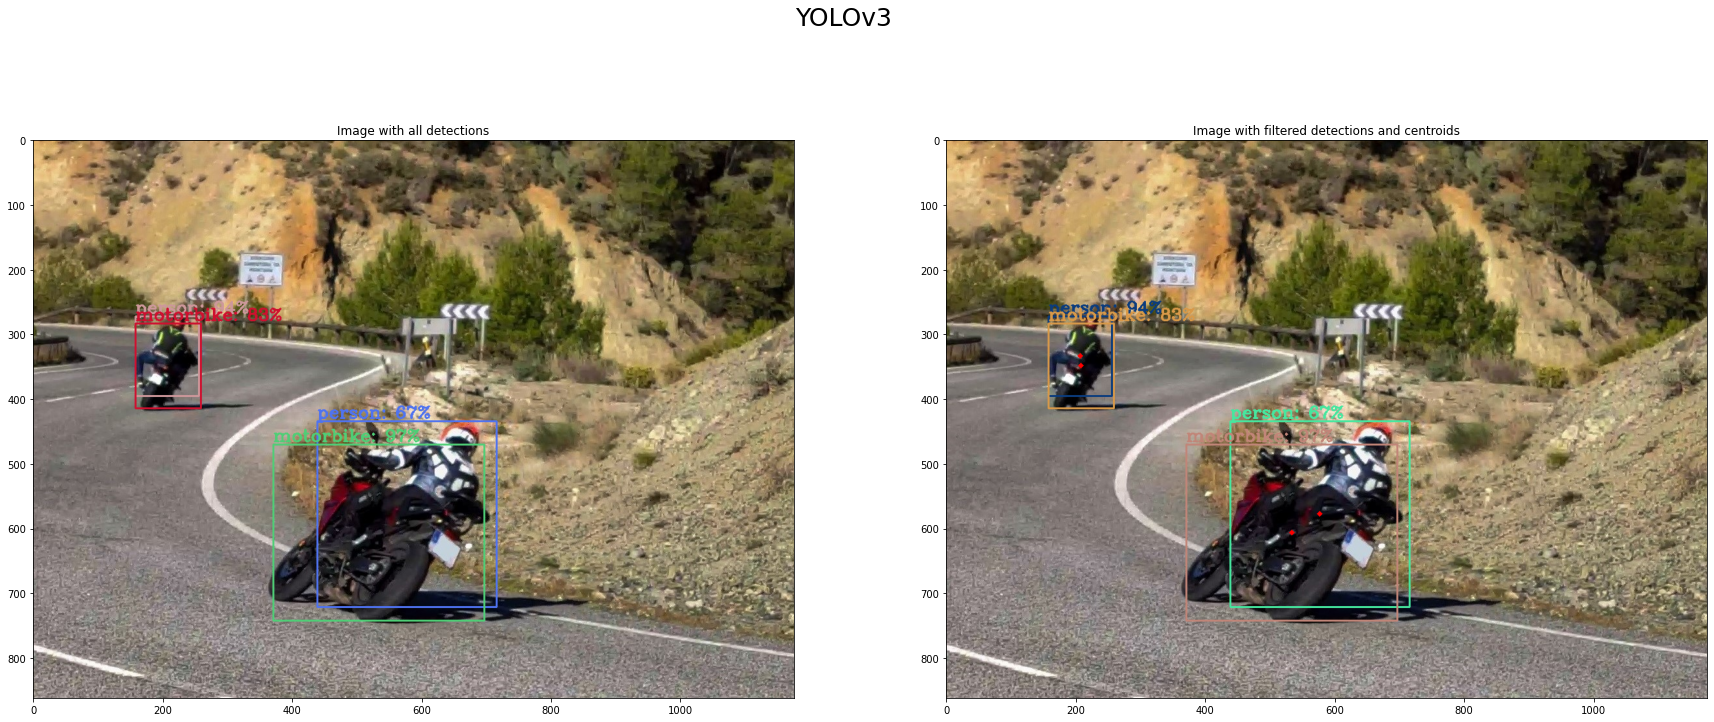

In [9]:
from simple_object_detection.models import YOLOv3

network = YOLOv3(size=(608, 608))
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'YOLOv3')

## Modelo: SSD+MobileNetV2

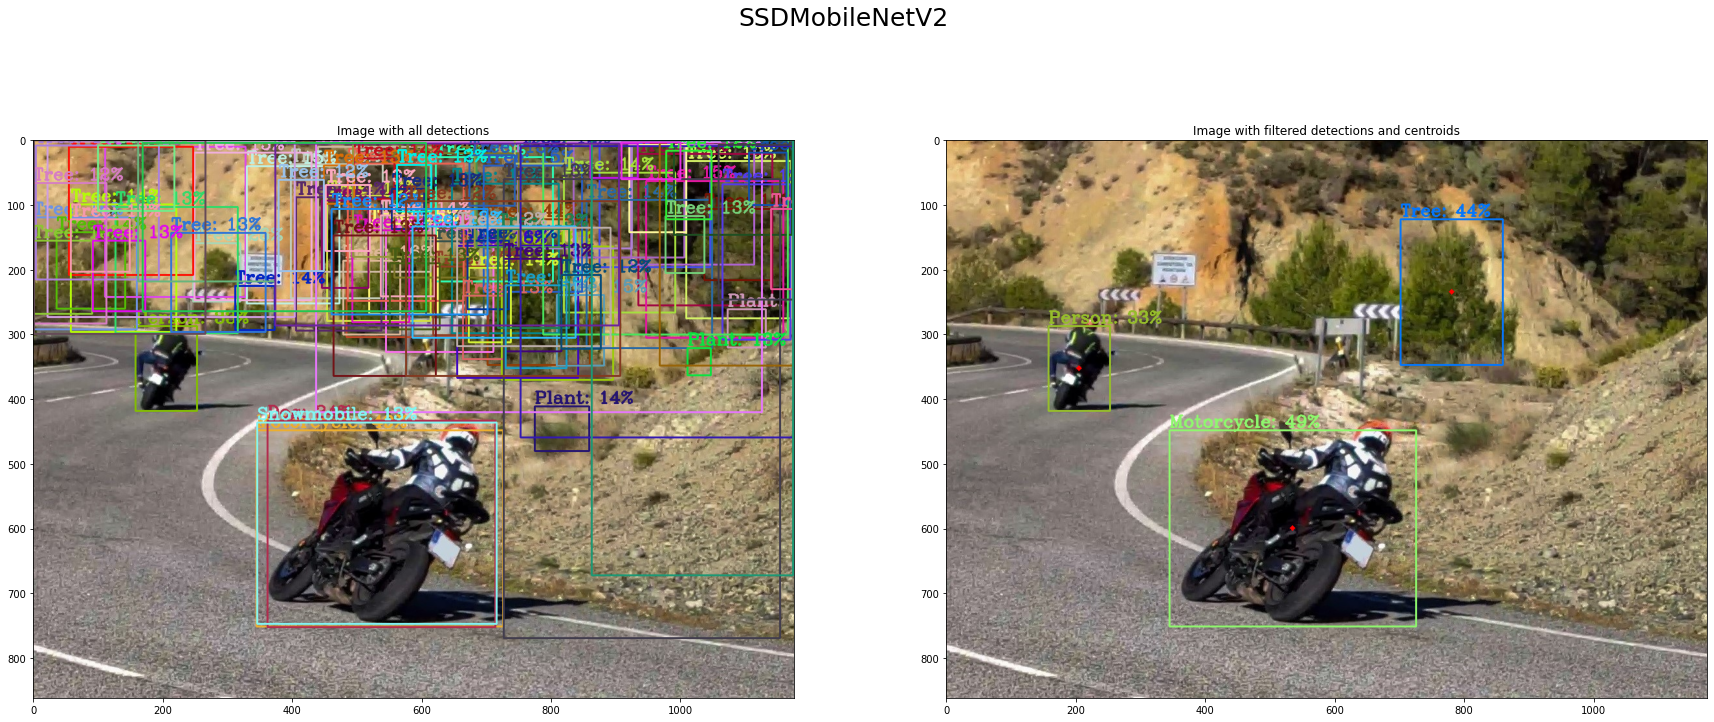

In [10]:
from simple_object_detection.models import SSDMobileNetV2

network = SSDMobileNetV2()
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'SSDMobileNetV2')

## Modelo: CenterNet HourGlass104 512x512

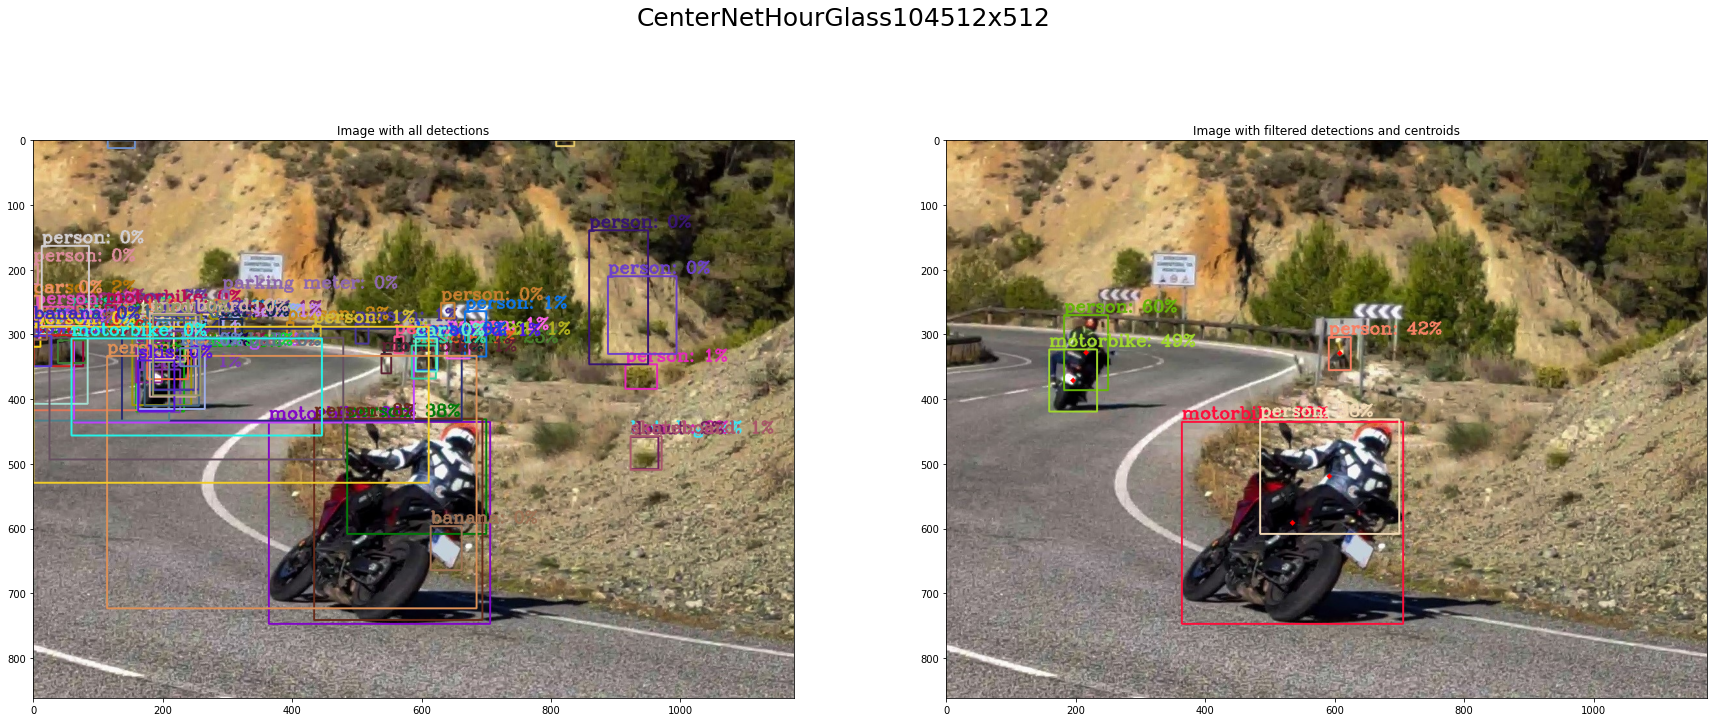

In [11]:
from simple_object_detection.models import CenterNetHourGlass104512x512

network = CenterNetHourGlass104512x512()
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'CenterNetHourGlass104512x512')

## Modelo: CenterNet HourGlass104 1024x1024

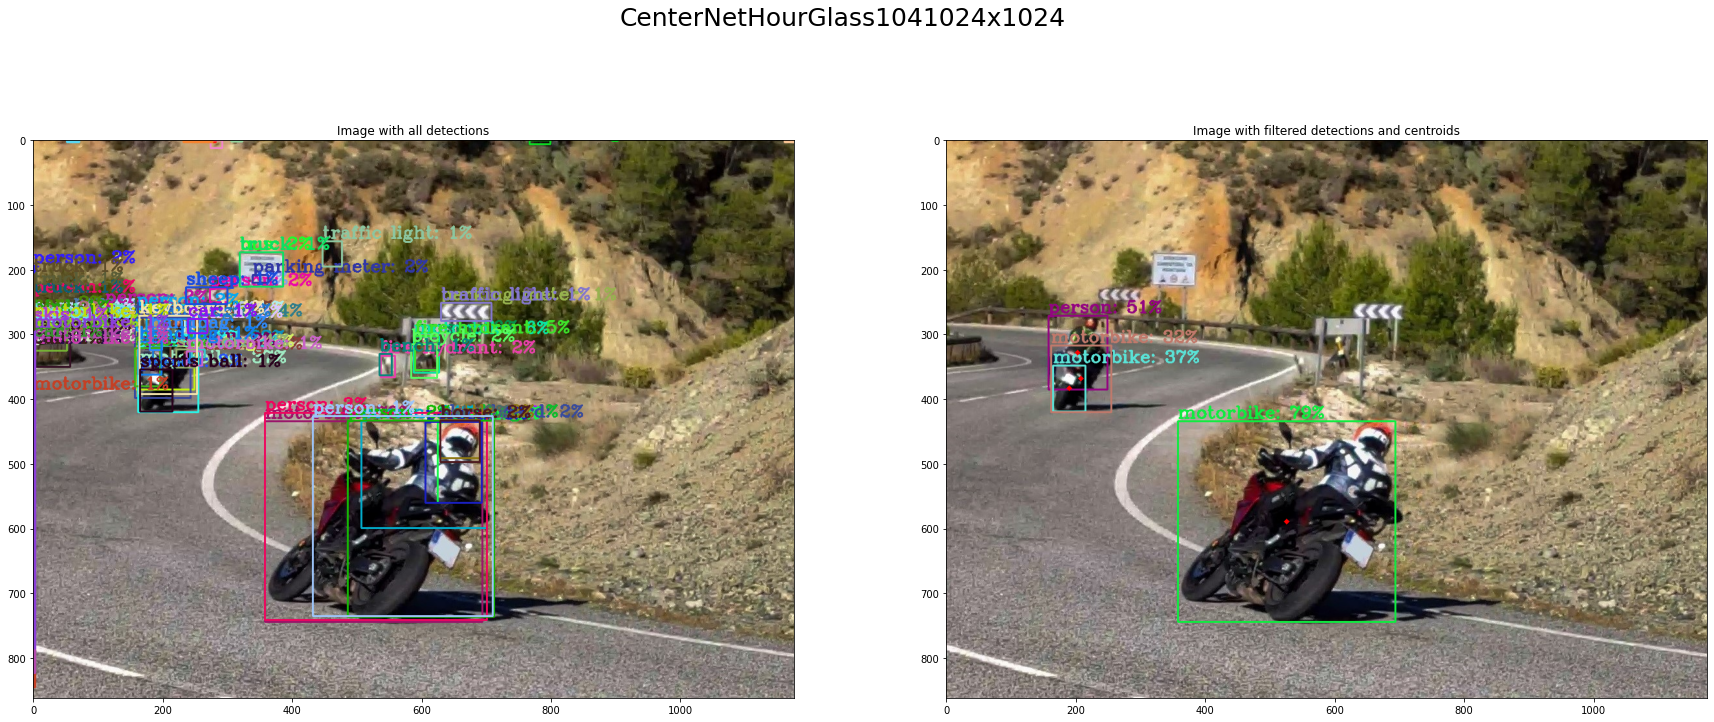

In [12]:
from simple_object_detection.models import CenterNetHourGlass1041024x1024

network = CenterNetHourGlass1041024x1024()
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'CenterNetHourGlass1041024x1024')

## Modelo: FasterRCNN+InceptionResNetV2

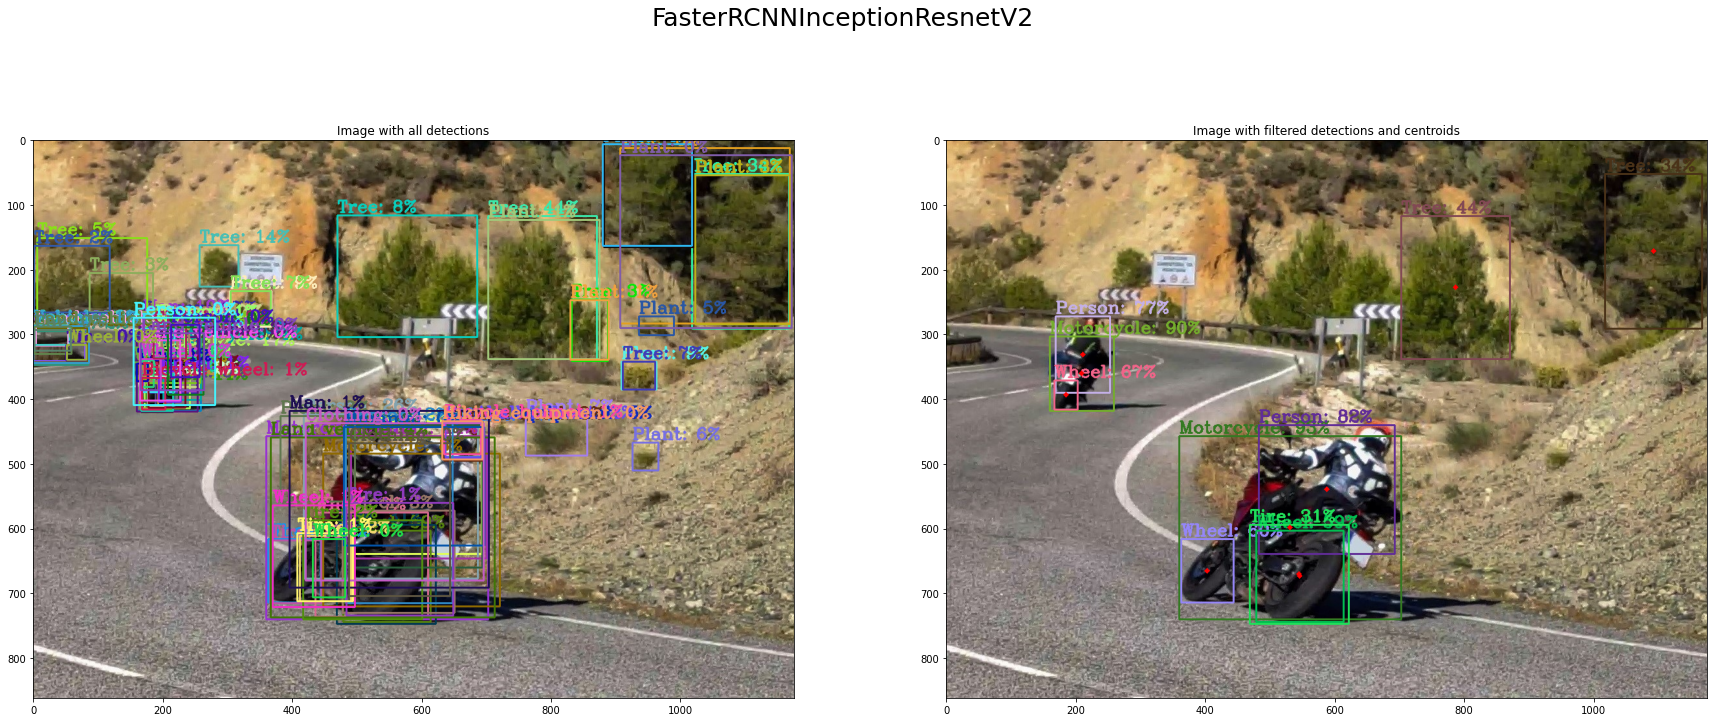

In [13]:
from simple_object_detection.models import FasterRCNNInceptionResnetV2

network = FasterRCNNInceptionResnetV2()
image, image_with_boxes, image_with_boxes_filtered, objects, objects_filtered = show_detections_in_image(network, image, 'FasterRCNNInceptionResnetV2')